In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
"""============================================================================
Kernel approximation using random Fourier features. Based on "Random Features
for Large-Scale Kernel Machines" by Rahimi and Recht (2007).
For more, see the accompanying blog post:
http://gregorygundersen.com/blog/2019/12/23/random-fourier-features/
============================================================================"""

import matplotlib.pyplot as plt
import numpy as np
from   sklearn.metrics.pairwise import rbf_kernel
from   sklearn.datasets import make_s_curve


# -----------------------------------------------------------------------------



In [10]:
N    = 1000
D    = 6
X, t = make_s_curve(N, noise=0.1)
X    = X[t.argsort()]
# The RBF kernel is the Gaussian kernel if we let \gamma = 1 / (2 \sigma^2).
K    = rbf_kernel(X, gamma=1/2.)

In [11]:
def gaussian_rff(X,R):
    """
    X is the original matrix
    R is the desired output dimension
    """
    D = X.shape[1]
    W    = np.random.normal(loc=0, scale=1, size=(R, D))
    b    = np.random.uniform(0, 2*np.pi, size=R)
    B    = np.repeat(b[:, np.newaxis], N, axis=1)
    #D = X.shape[1]
    norm = 1./ np.sqrt(R)
    Z    = norm * np.sqrt(2) * np.cos(W @ X.T + B)
    ZZ   = Z.T@Z
    return ZZ

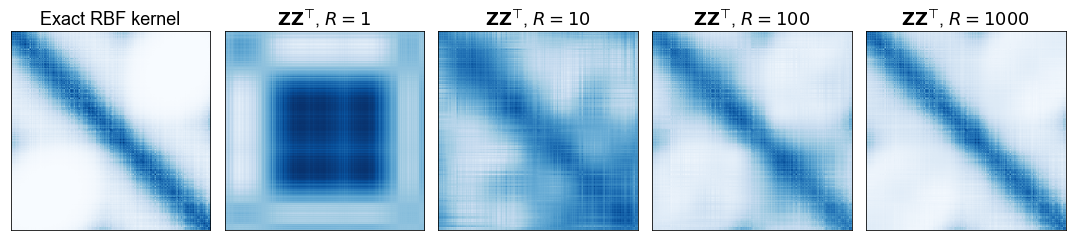

In [12]:
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(15, 4)
font = {'fontname': 'arial', 'fontsize': 18}
axes[0].imshow(K, cmap=plt.cm.Blues)
axes[0].set_title('Exact RBF kernel', **font)
axes[0].set_xticks([])
axes[0].set_yticks([])
for R, ax in zip([1, 10, 100,1000], axes[1:]):
    ZZ = gaussian_rff(X,R) 
    ax.imshow(ZZ, cmap=plt.cm.Blues)
    ax.set_title(r'$\mathbf{Z} \mathbf{Z}^{\top}$, $R=%s$' % R, **font)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()